In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import sys, os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
import numpy as np
import time

from LandMPC.MPCLandControl import MPCLandControl
from src.rocket import Rocket, perturb_rocket
from src.pos_rocket_vis import *

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

Ts  = 1/20
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
rocket.mass = 1.7  # Do not change!!!

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Linearization around a steady state:
x_ref =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
xs =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
us =  [ 0.          0.         56.66666667  0.        ]
A =
 [[1.   0.  ]
 [0.05 1.  ]]
B =
 [[0.00865235]
 [0.00021631]]
K_lqr =
 [[20.39369744 28.80585866]]
K =
 [[-20.39369744 -28.80585866]]
P =
 [[1274.23382763 1829.11834887]
 [1829.11834887 7079.70475038]]
A_cl =
 [[ 0.82354653 -0.24923846]
 [ 0.04558866  0.99376904]]
eig(A_cl) = [0.90865779+0.06417572j 0.90865779-0.06417572j]
max |eig(A_cl)| = 0.9109212333425355
Minimal robust invariant set computation converged after 40 ite

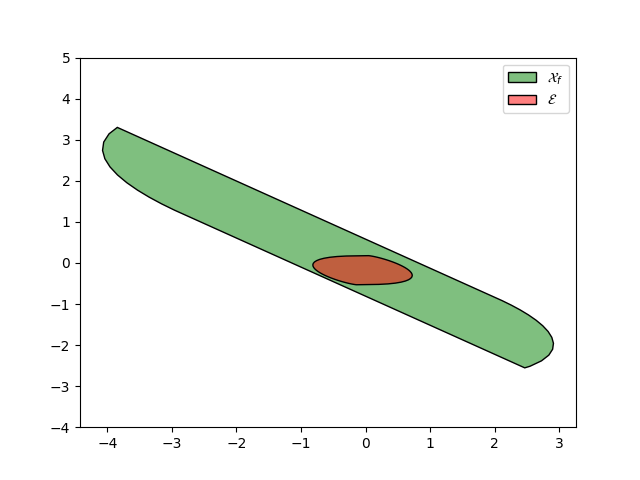

In [3]:
import numpy as np

sim_time = 10.0

x0 = np.zeros(12, dtype=float)
x0[9]  = 3.0                 # x
x0[10] = 2.0                 # y
x0[11] = 10.0                # z
x0[5]  = np.deg2rad(30.0)    # roll gamma

x_ref = np.array([0.]*9 + [1., 0., 3.], dtype=float)
xs, us = rocket.trim(x_ref)

print("Linearization around a steady state:")
print("x_ref = ", x_ref)
print("xs = ", xs)
print("us = ", us)

A, B = rocket.linearize(xs, us)
H = 6.0

mpc = MPCLandControl().new_controller(rocket, Ts, H, x_ref=x_ref)


Simulating time 0.00
Simulating time 1.00
Simulating time 2.00
Simulating time 3.00


/home/rimelq/Anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Simulating time 4.00
Simulating time 5.00
Simulating time 6.00
Simulating time 7.00
Simulating time 8.00
Simulating time 9.00


AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=199, step=2), IntSlider(value=0…

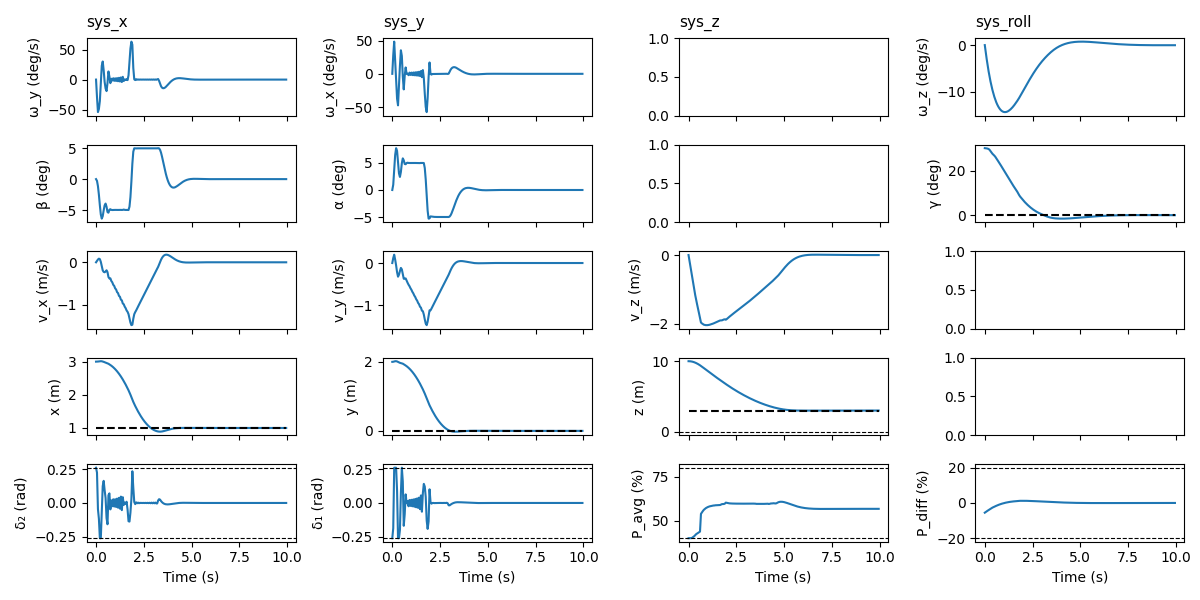

In [4]:
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol = rocket.simulate_land(mpc, sim_time, H, x0)
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, T_ol=t_ol[..., :-1], X_ol=x_ol, U_ol=u_ol)
plot_static_states_inputs(t_cl[:-1], x_cl[:, :-1], u_cl, xs)
